# Star,Galaxy and Qso Classification

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('space_server.csv')
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
#checking shape
df.shape

(10000, 18)

it is having 100000 rows and 18 indexes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


only class column is having object datatype

In [5]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [6]:
#checking for null values
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

there are no null values present in the dataset

In [7]:
#checking skewness
df.skew()

objid        0.000000
ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
rerun        0.000000
camcol      -0.100220
field        0.249795
specobjid    1.794627
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

In [8]:
#now lets check target categories
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [9]:
# dealing with categorical target column
df['class']=df['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

In [10]:
df.dtypes

objid        float64
ra           float64
dec          float64
u            float64
g            float64
r            float64
i            float64
z            float64
run            int64
rerun          int64
camcol         int64
field          int64
specobjid    float64
class          int32
redshift     float64
plate          int64
mjd            int64
fiberid        int64
dtype: object

now all columns are in numerical form

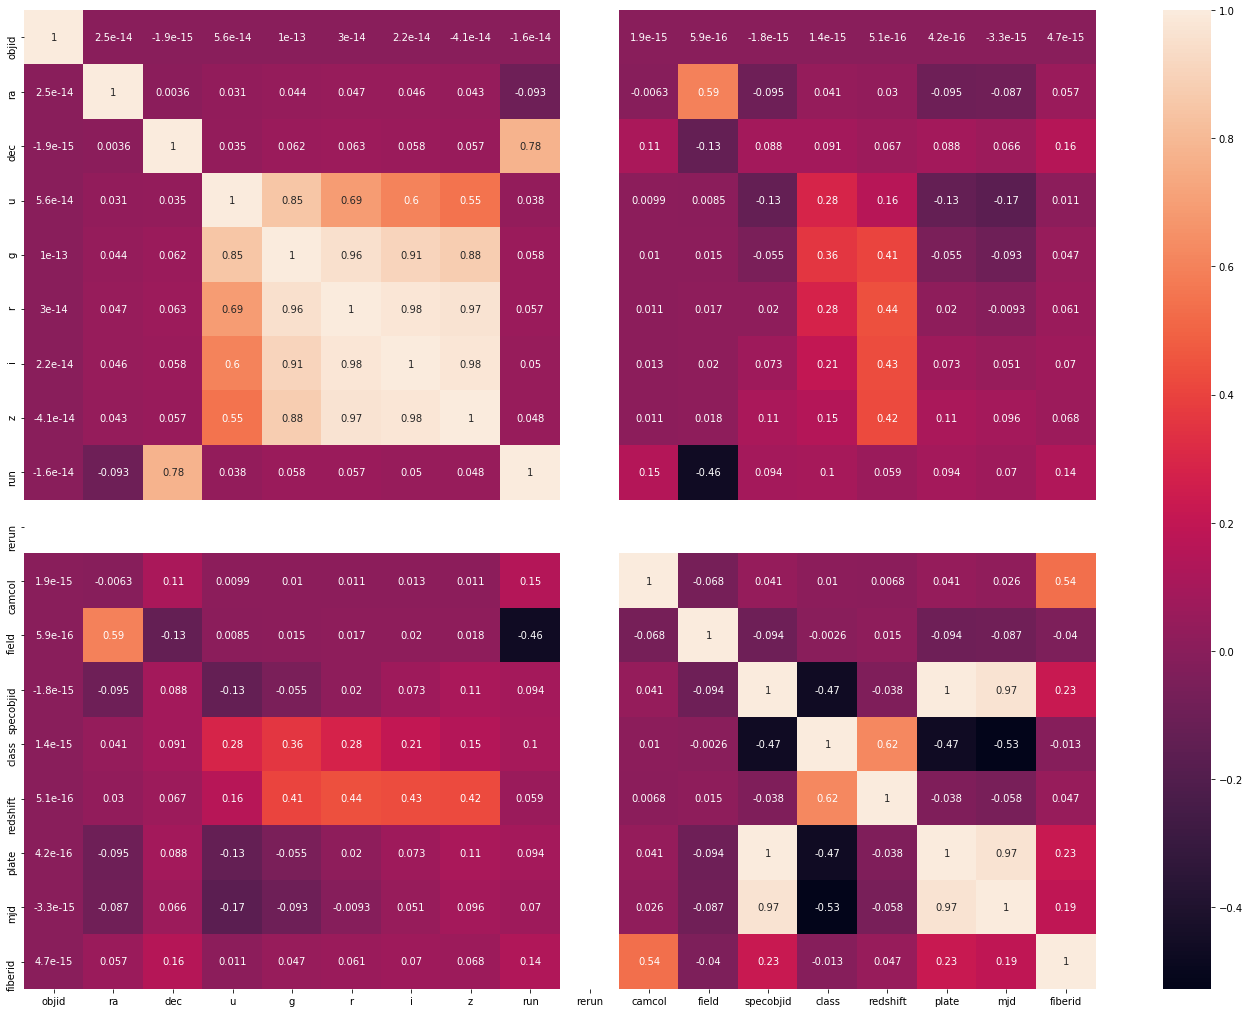

In [11]:
#checking correlation
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),annot=True)

most of the columns are negatively correlated with class column..so lets drop some features

In [12]:
df=df.drop(['objid','rerun','specobjid','fiberid'],axis=1)

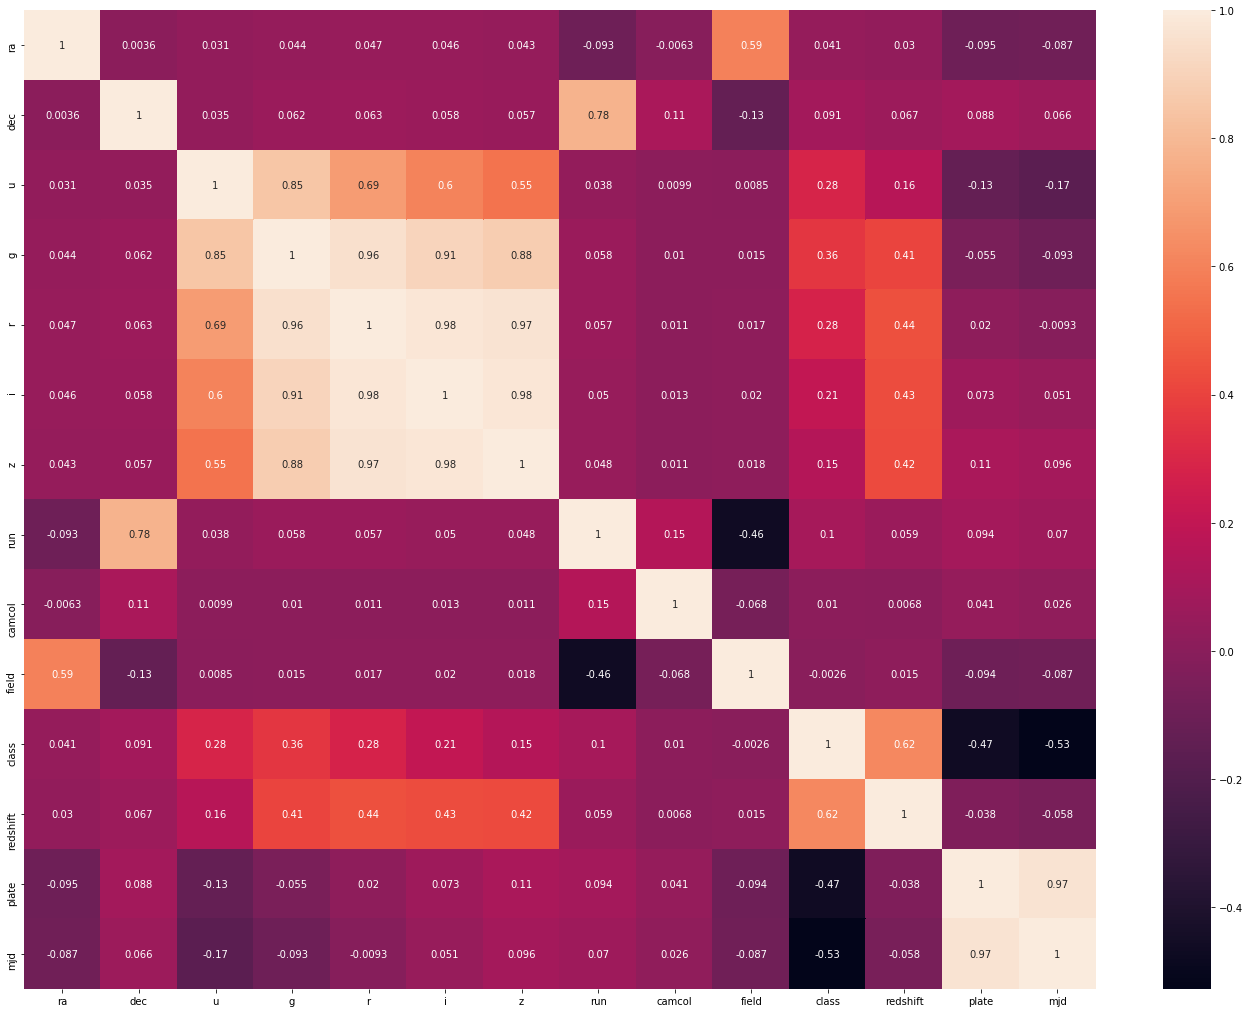

In [13]:
#again check the correlation
plt.figure(figsize=(24,18))
sns.heatmap(df.corr(),annot=True)

Most of the columns are correlated with each other

In [15]:
#describing statistics
df.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.669800,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.625465,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,0.000000,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000000,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,1.000000,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,1.000000,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,2.000000,5.353854,8410.000000,57481.000000


1    4998
0    4152
2     850
Name: class, dtype: int64


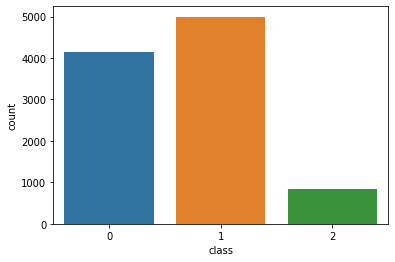

In [16]:
#lets visualize the count
sns.countplot(df['class'],data=df)
print(df['class'].value_counts())

(array([ 394.,   60.,   54.,    0.,  899., 1240., 3067., 2364.,  932.,
         990.]),
 array([  8.2351005 ,  33.50002863,  58.76495676,  84.02988489,
        109.29481302, 134.55974115, 159.82466928, 185.08959741,
        210.35452554, 235.61945367, 260.8843818 ]),
 <a list of 10 Patch objects>)

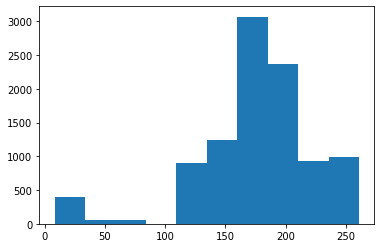

In [17]:
plt.hist(df.ra)

(array([7064.,    0.,  396.,    0.,   25.,   63.,  227.,  579.,  578.,
        1068.]),
 array([-5.3826325 ,  2.00985729,  9.40234708, 16.79483687, 24.18732666,
        31.57981646, 38.97230625, 46.36479604, 53.75728583, 61.14977562,
        68.54226541]),
 <a list of 10 Patch objects>)

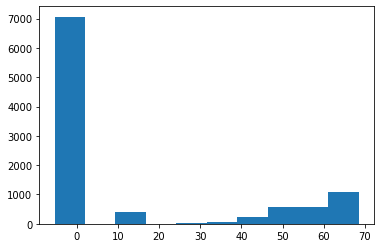

In [18]:
plt.hist(df.dec)

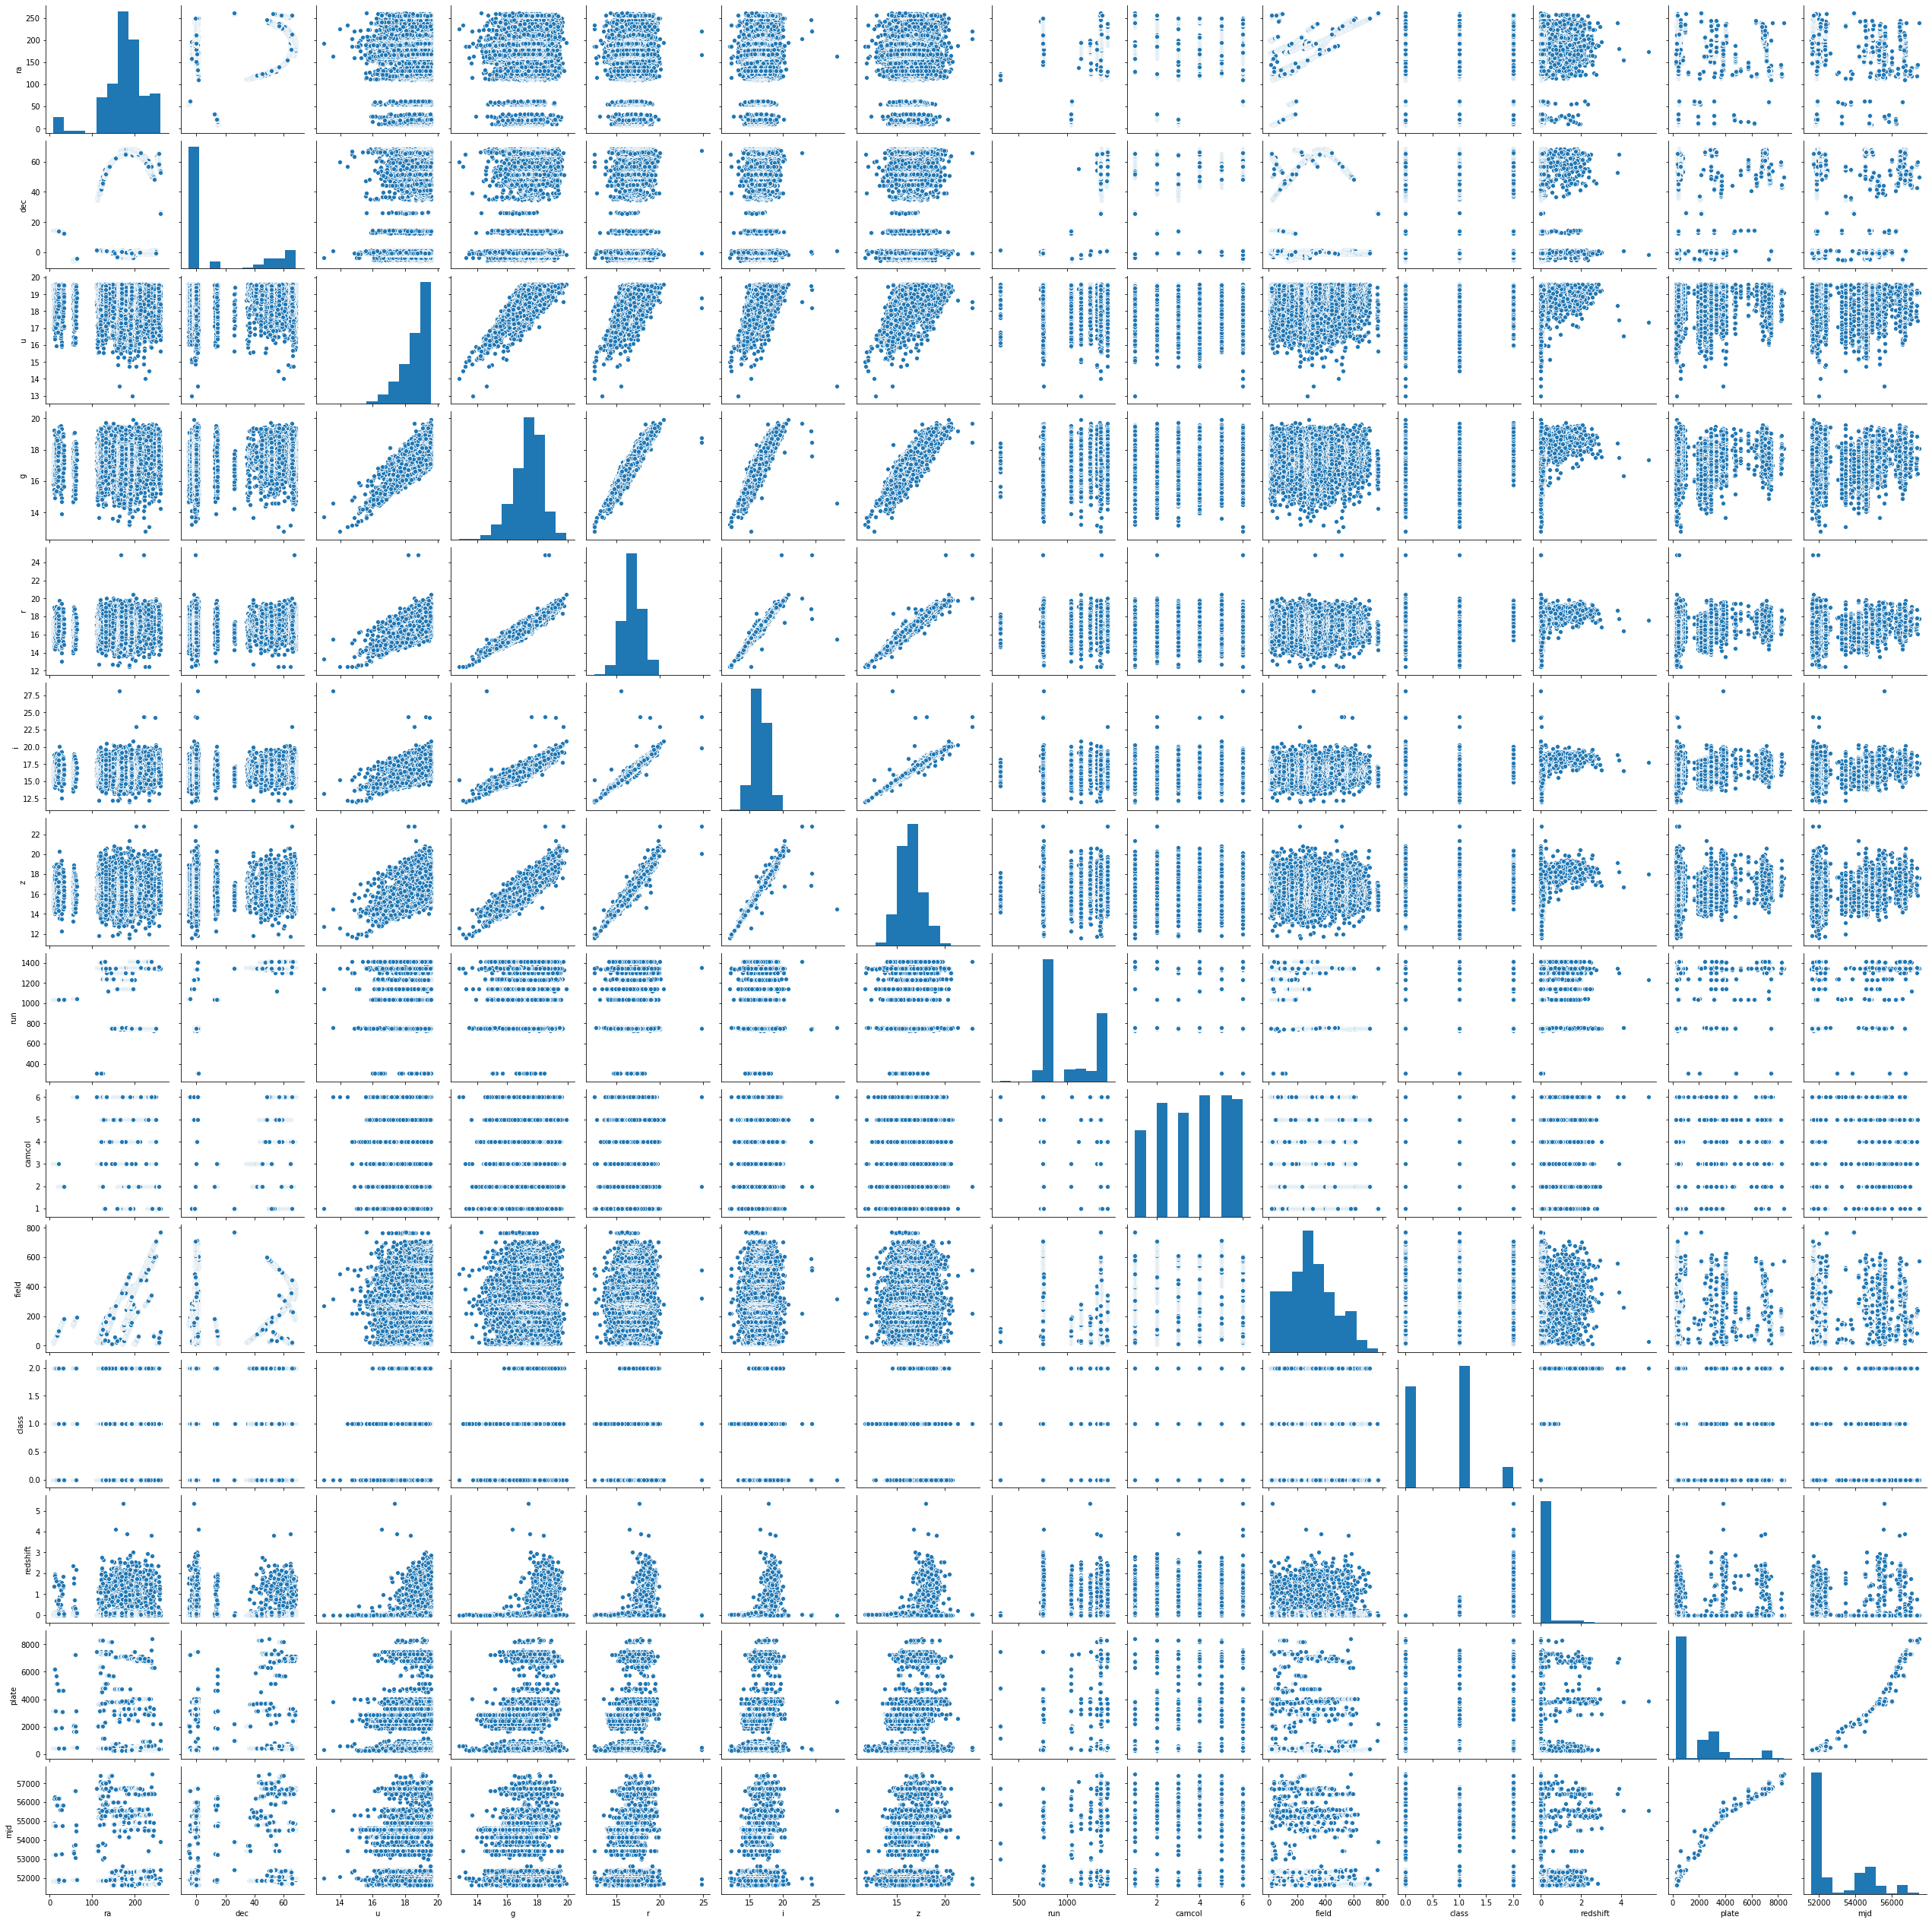

In [19]:
sns.pairplot(df)

In [20]:
#preparing the data
x=df.drop(['class'],axis=1)
y=df['class']

In [21]:
# Model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler


In [22]:
#lets split the data for modeling
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,shuffle=True)

In [23]:
#scaling the data
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [24]:
# Checking scores for different models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
model=[SVC(), DecisionTreeClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

accuracy score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is:
0.9565
[[789  25   0]
 [ 46 948   2]
 [  3  11 176]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       814
           1       0.96      0.95      0.96       996
           2       0.99      0.93      0.96       190

    accuracy                           0.96      2000
   macro avg       0.96      0.95      0.96      2000
weighted avg       0.96      0.96      0.96      2000



accuracy score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, mi

All models are working fine but cross validate for decision tree as score is highest among all

In [25]:
#cross validation for decision tree classifier
from sklearn.model_selection import cross_val_score
dtcscores=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)
print(dtcscores)
print(dtcscores.mean())

[0.986 0.983 0.987 0.982 0.987]
0.985


as this score is somewhat higher than decisiontreeclassifier score , we can check for random forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


In [27]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_predr=rfc.predict(x_test)
print('Accuracy score',accuracy_score(y_test,y_predr))
print('confusion_matrix',confusion_matrix(y_test,y_predr))
print('classification_report',classification_report(y_test,y_predr))

Accuracy score 0.985
confusion_matrix [[814   0   0]
 [ 16 977   3]
 [  0  11 179]]
classification_report               precision    recall  f1-score   support

           0       0.98      1.00      0.99       814
           1       0.99      0.98      0.98       996
           2       0.98      0.94      0.96       190

    accuracy                           0.98      2000
   macro avg       0.98      0.97      0.98      2000
weighted avg       0.99      0.98      0.98      2000



In [28]:
#cross validation for random forest
from sklearn.model_selection import cross_val_score
rfcscores=cross_val_score(rfc,x,y,cv=5)
print(rfcscores)
print(rfcscores.mean())

[0.99   0.993  0.991  0.984  0.9865]
0.9889000000000001


as accuracy score and mean score with cross validation nearly is same so we can save this model

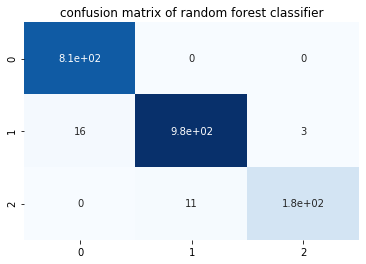

In [29]:
#plotting confusion matrix for random forest classifier
cm=confusion_matrix(y_test,y_predr)
sns.heatmap(cm,annot=True,cbar=False,cmap="Blues")
plt.title("confusion matrix of random forest classifier")
plt.show()

In [30]:
#lets save a model
from sklearn.externals import joblib
joblib.dump(rfc,'space_server.pkl')

['space_server.pkl']

In [31]:
df1=pd.DataFrame(y_predr)
df1.to_csv("space_serverresults.csv")